# Regression

Regression is **supervised** machine learning technique for predicting a **continuous** target variable. 

1. Ordinary Least Squares: [sklearn.linear_model.LinearRegression(Normalize=True)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

2. LASSO$^{1}$ + LARS$^{2}$  Performs both feature selection and noise reduction to avoid overfitting (through Regularization$^{3}$) to improve prediction performance and interpretability. Y should be normally distributed. [sklearn.linear_model.LassoLars(alpha=1.0)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html). \$alpha$ = 0 is the OLS algorithm, so similar to running LinearRegression. Higher alpha will be more robust to collinearity between features. 


3. Polynomial Regression: just like an ordinary linear model, but where the features are polynomial. So we create polynomial features using [sklearn.preprocessing.PolynomialFeatures(degree=d)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform) and then fit a model using [sklearn.linear_model.LinearRegression(Normalize=True)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

4. Generalized Linear Model: Allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO).  [sklearn.linear_model.TweedieRegressor(power=n, alpha=1.0)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html)

Awesome...but what do I do with that information? 


- For a normally distributed y and a linear relationship, the first 2 options are best. 

- For polynomial relationships, polynomial regression is best. 

- For normal, poisson, gamma or inverse gaussian distributions, use the Generalize Linear Model. 


How do you know what you have? 

1. plt.hist(y_train)

2. what shape does it resemble?

3. try different algorithms!


### for practice: 

1. set baseline predictions (mean, median)

2. evaluate the baseline (we are comparing y (actual values) to the predicted values, which are all the same value...the mean of y, e.g.)

    - y: 19, 18, 12, 8, 5
    
    - y_pred: 11, 11, 11, 11, 11

3. LinearRegression()

4. LassoLars()

5. PolynomialFeatures(degree=2) ... then LinearRegression()

for each one, evaluate with training predictions, and then with validate predictions. 

In [3]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

path='student-mat.csv'

df, X_train_explore, \
    X_train_scaled, y_train, \
    X_validate_scaled, y_validate, \
    X_test_scaled, y_test = wrangle.wrangle_student_math(path)

In [4]:
X_train_scaled.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
142,0.000000,1.00,1.00,0.000000,0.666667,0.000000,0.75,0.25,0.25,0.00,0.00,1.00,0.035714,0.357143,0.578947
326,0.333333,0.75,0.75,0.000000,0.000000,0.000000,0.75,0.50,1.00,0.50,1.00,1.00,0.053571,0.714286,0.789474
88,0.166667,0.50,0.50,0.333333,0.333333,0.333333,0.75,0.75,0.25,0.00,0.00,0.50,0.214286,0.500000,0.526316
118,0.333333,0.25,0.75,0.666667,0.333333,0.333333,1.00,0.25,0.75,0.00,0.75,1.00,0.357143,0.357143,0.368421
312,0.666667,0.25,0.50,0.000000,0.333333,0.333333,0.75,1.00,0.25,0.25,0.25,0.75,0.053571,0.642857,0.578947


(array([20.,  0.,  1., 17., 34., 60., 30., 36., 14.,  9.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

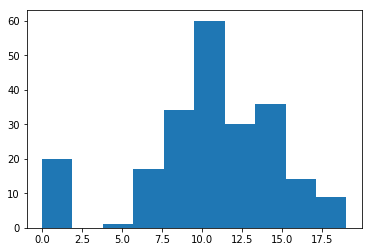

In [5]:
plt.hist(y_train)

In [ ]:
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

## Create a baseline

In [35]:
np.mean(y_train)
# np.median(y_train)

10.524886877828054

In [36]:
from sklearn.metrics import mean_squared_error

baseline_rmse = mean_squared_error(y_train, np.full(221, np.mean(y_train)))**1/2

## Create multiple models

- LinearRegression()

- LassoLars()

- PolynomialFeatures(), LinearRegression()

- TweedieRegressor()

### LinearRegression()

Fit the model

In [64]:
lm = LinearRegression(normalize=True)
lm.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Predict our **training** observations

In [65]:
lm_pred = lm.predict(X_train_scaled)

Evaluate our **training** predictions

In [66]:
# compute root mean squared error
lm_rmse = mean_squared_error(y_train, lm_pred)**1/2
lm_rmse

1.5318707004095158

**If I find this is one of my top models:**

Predict our **validation** observations

In [68]:
lm_pred_v = lm.predict(X_validate_scaled)
# lm_pred_v

Evaluate our **validation** predictions

In [69]:
lm_rmse_v = mean_squared_error(y_validate, lm_pred_v)**1/2
lm_rmse_v

2.260805772673469

### LassoLars()

Fit the model using **training** dataset

In [70]:
lars = LassoLars(alpha=0.1)
lars.fit(X_train_scaled, y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

Predict our **training** observations

In [71]:
lars_pred = lars.predict(X_train_scaled)

Evaluate our **training** predictions

In [72]:
lars_rmse = mean_squared_error(y_train, lars_pred)**1/2
lars_rmse

2.8706853377983266

**If I find this is one of my top models:**

Predict our **validation** observations

In [73]:
lars_pred_v = lars.predict(X_validate_scaled)

Evaluate our **validation** predictions

In [75]:
lars_rmse_v = mean_squared_error(y_validate, lars_pred_v)**1/2
lars_rmse_v

3.091594747961

### PolynomialFeatures + LinearRegression

2nd degree polynomial

1. Create the new features, which are our original features squared. 
2. fit the Linear Regression model
3. Predict on train
4. Evaluate on train
5. transform our validate features to make them squared
6. predict on validate
7. evaluate on validate. 

In [80]:
# make the polynomial thing
pf = PolynomialFeatures(degree=2)

# fit and transform the thing
# to get a new set of features..which are the original features sqauared
X_train_squared = pf.fit_transform(X_train_scaled)
X_validate_squared = pf.transform(X_validate_scaled)
# X_validate_squared

Fit the model on training data

In [81]:
# feed that data into our linear model. 
# make the thing
lm_squared = LinearRegression()
lm_squared.fit(X_train_squared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predict our training observations

In [82]:
lm_squared_pred = lm_squared.predict(X_train_squared)

Evaluate our training predictions

In [83]:
lm_squared_rmse = mean_squared_error(y_train, lm_squared_pred)**1/2
lm_squared_rmse

0.5450147535110965

**If I find this is one of my top models:**

Predict our **validation** observations

In [84]:
lm_squared_pred_v = lm_squared.predict(X_validate_squared)

Evaluate our **validation** predictions

In [85]:
lm_squared_rmse_v = mean_squared_error(y_validate, lm_squared_pred_v)**1/2
lm_squared_rmse_v

5.85621291143576

The large discrepancy here indicates possible overfitting of the quadratic model to our training data. 

Let's try a third degress polynomial

create the new features, which are the original features, cubed. 

In [86]:
# make the polynomial thing
pf = PolynomialFeatures(degree=3)

# fit and transform the thing
# to get a new set of features..which are the original features sqauared
X_train_cubed = pf.fit_transform(X_train_scaled)
X_validate_cubed = pf.transform(X_validate_scaled)

Fit the model using our training observations that have been cubed. 

In [87]:
# feed that data into our linear model. 
# make the thing
lm_cubed = LinearRegression()
lm_cubed.fit(X_train_cubed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predict our training observations (the cubed version)

In [89]:
lm_cubed_pred = lm_cubed.predict(X_train_cubed)

Evaluate our predictions on training observations

In [90]:
lm_cubed_rmse = mean_squared_error(y_train, lm_cubed_pred)**1/2
lm_cubed_rmse

3.5891431053206286e-28

How will this perform on data it has not seen? Has it overfit to the training data? 

Predict on the validation observations, but the dataset that we have cubed! 

In [91]:
lm_cubed_pred_v = lm_cubed.predict(X_validate_cubed)

Evaluate our predictions on validation observations

In [92]:
lm_cubed_rmse_v = mean_squared_error(y_validate, lm_cubed_pred_v)**1/2
lm_cubed_rmse_v

20.63132019137655

Given the errors and the difference in errors from train to validate for each of the models, it appears an ordinary least squares is the best fit for our data. 
We will go with the lm model. 
Predict on test and evaluate. 


In [93]:
lm_pred_test = lm.predict(X_test_scaled)
lm_rmse_test = mean_squared_error(y_test, lm_pred_test)**1/2
lm_rmse_test

1.8489414051769122

In [94]:
baseline_rmse

10.120165434778158

## Evaluate and compare

- metrics.mean_squared_error()

In [53]:
lm_rmse = mean_squared_error(y_train, lm_pred)**1/2
lars_rmse = mean_squared_error(y_train, lars_pred)**1/2
lm_squared_rmse = mean_squared_error(y_train, lm_squared_pred)**1/2
lm_cubed_rmse = mean_squared_error(y_train, lm_cubed_pred)**1/2

print("Baseline, Mean: ", baseline_rmse)
print("Linear Model: ", lm_rmse)
print("LassoLars: ", lars_rmse)
print("Polynomial, squared: ", lm_squared_rmse)
print("Polynomial, cubed: ", lm_cubed_rmse)

Baseline, Mean:  10.120165434778158
Linear Model:  1.5318707004095158
LassoLars:  2.8706853377983266
Polynomial, squared:  0.5450147535110965
Polynomial, cubed:  3.5891431053206286e-28


### Validate: did we overfit? 

In [54]:
lm_validate_pred = lm.predict(X_validate_scaled)
lm_rmse_validate = mean_squared_error(y_validate, lm_pred)**1/2
lm_rmse_validate

ValueError: Found input variables with inconsistent numbers of samples: [95, 221]

$^{1}$ LASSO = Least Absolute Shrinkage and Selection Operator

$^{2}$ LARS = Least Angle Regression

$^{3}$ Regularization = "Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting." [Towards Data Science](https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea)